In [1]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

set_matplotlib_formats("svg")

[autoreload of src.models.regression failed: Traceback (most recent call last):
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 274, in check
    superreload(m, reload, self.old_objects, self.shell)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 323, in update_instances
    object.__setattr__(ref, "__class__", new)
TypeError

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

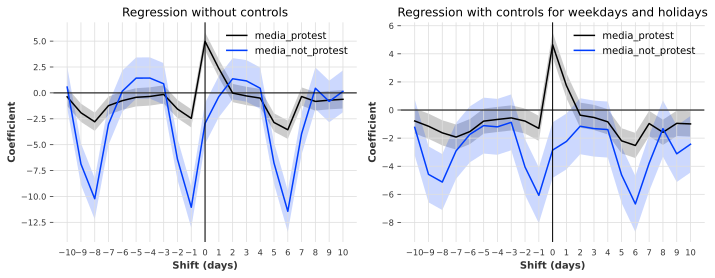

In [15]:
import matplotlib.pyplot as plt

from src.features.time_series.lagged_impact import plot_lagged_impact
from src.models.regression import regression

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
results = regression(include_controls=False)
plot_lagged_impact(results, "occ_FFF", "protest", ax=axes[0])
axes[0].set_title("Regression without controls")

results = regression(max_lags=0)
plot_lagged_impact(results, "occ_FFF", "protest", ax=axes[1])
axes[1].set_title("Regression with controls for weekdays and holidays")
fig.tight_layout()
plt.show()

In [18]:
results[
    (results["target"] == "media_protest")
    & (results["lag"] == 0)
    & (results["shift"] == 0)
].sort_values("coef", key=abs, ascending=False).head(20)

,coef,predictor,lag,target,ci_lower,ci_upper,shift
1784,6.986973e+11,SERIES_0,0,media_protest,-3.555492e+12,4.952887e+12,0
1785,6.291544e+11,SERIES_1,0,media_protest,-3.201606e+12,4.459915e+12,0
1786,5.596114e+11,SERIES_2,0,media_protest,-2.847720e+12,3.966942e+12,0
1787,4.900684e+11,SERIES_3,0,media_protest,-2.493833e+12,3.473970e+12,0
1788,4.205255e+11,SERIES_4,0,media_protest,-2.139947e+12,2.980998e+12,0
1789,3.509825e+11,SERIES_5,0,media_protest,-1.786060e+12,2.488025e+12,0
1790,2.814396e+11,SERIES_6,0,media_protest,-1.432174e+12,1.995053e+12,0
1791,2.118966e+11,SERIES_7,0,media_protest,-1.078288e+12,1.502081e+12,0
1797,-2.053611e+11,SERIES_13,0,media_protest,-1.455753e+12,1.045030e+12,0
1792,1.423536e+11,SERIES_8,0,media_protest,-7.244014e+11,1.009109e+12,0


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
results[["predictor", "lag"]].sort_values(["predictor", "lag"]).drop_duplicates()

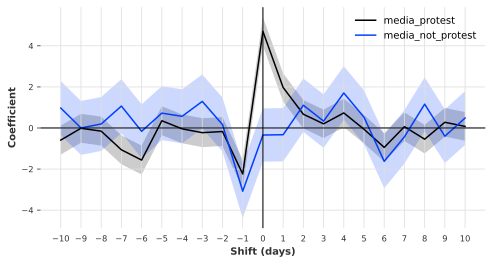

In [10]:
plot_lagged_impact(results, "occ_FFF", "protest")
plt.show()